# Descriptive Exploration PUF and Counties Aggregate Data

DeSYNPuf Counties Aggregate with Elixhauser Sums per User & RWJF Factor Rankings Dataset

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

The file contains aggregated Medicare data from 2008-2010 (DeSYNPuf Synthetic Public Use Files), RWJF County Health Factors and Outcomes Ranking Data from 2010, and BRFSS aggregated 2010 data for 302 out of the 3012 counties.

2960 out of 3012 counties (98%) had a Medicare beneficiary with at least one inpatient or outpatient claim filed between 2008 and 2010. 

In [2]:
medicare_counties = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED.csv")
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")
medicare_counties.columns=medicare_counties.columns.str.strip()


In [3]:
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS_STATE_CODE        3010 non-null   float64
 1   FIPS_COUNTY_CODE       3010 non-null   float64
 2   CNTY_BENE_CT           3010 non-null   int64  
 3   CNTY_BENE_USRS         3010 non-null   int64  
 4   CNTY_MEAN_AGE          2957 non-null   float64
 5   CNTY_SEX_PROP          3010 non-null   float64
 6   TOT_CNCR_CASES         3010 non-null   float64
 7   TOT_STRKETIA_CASES     3010 non-null   float64
 8   TOT_ESRD_CASES         3010 non-null   float64
 9   CNTY_TOT_VSTS          3010 non-null   int64  
 10  CNTY_TOT_IP_VSTS       3010 non-null   int64  
 11  CNTY_TOT_OP_VSTS       3010 non-null   int64  
 12  CNTY_MEAN_IP_STAY      3010 non-null   float64
 13  CBSA                   1091 non-null   float64
 14  CNTY_TOT_CCS           3010 non-null   float64
 15  CNTY

Here are the counties with no Medicare claimants for the period.  

(We know they had no claimants, because age was calculated for beneficiaries based on their claim dates, either for inpatient or outpatient.)

Some have high RWJF rankings (closer to 1) and some have low rankings.

A few are part of Metropolitan or Micropolitan Statistical Areas (CBSA)s.

In [4]:
no_claims = medicare_counties[medicare_counties["CNTY_MEAN_AGE"].isnull()]
nc_summary = no_claims[["STATE", "COUNTY", "HF_PROP_RANK", "HO_PROP_RANK"]]
nc_summary.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,HF_PROP_RANK,HO_PROP_RANK
2326,South Dakota,Todd,0.018,0.070
1584,Montana,Roosevelt,0.023,0.000
1949,North Dakota,Sioux,0.023,0.000
872,Kansas,Elk,0.030,0.101
279,Colorado,Saguache,0.036,0.625
117,Arkansas,Desha,0.093,0.133
2400,Tennessee,Pickett,0.095,0.389
2825,Washington,Adams,0.154,0.436
898,Kansas,Lincoln,0.212,0.646
2373,Tennessee,Houston,0.263,0.263


In [5]:
# Drop an empty row

medicare_counties.drop(medicare_counties.iloc[78].name,  inplace=True)

In [6]:
# Drop a handful of unranked counties

medicare_counties = medicare_counties.dropna(subset=['HO_RANK', 'HF_RANK'])

In [7]:
# Set per-User NaNs to Zeros

medicare_counties[['TOT_VSTS_PU', 'TOT_IP_VSTS_PU', 'TOT_OP_VSTS_PU', 'PRVDRS_PU', 'TOT_IPDAYS_PU', 'TOT_CCS_PU', 'TOT_NEW_CC_PU', 'TOT_ELIX_PU']] = medicare_counties[['TOT_VSTS_PU', 'TOT_IP_VSTS_PU', 'TOT_OP_VSTS_PU', 'PRVDRS_PU', 'TOT_IPDAYS_PU', 'TOT_CCS_PU', 'TOT_NEW_CC_PU', 'TOT_ELIX_PU']].fillna(value=0)

In [8]:
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 3009
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS_STATE_CODE        2949 non-null   float64
 1   FIPS_COUNTY_CODE       2949 non-null   float64
 2   CNTY_BENE_CT           2949 non-null   int64  
 3   CNTY_BENE_USRS         2949 non-null   int64  
 4   CNTY_MEAN_AGE          2911 non-null   float64
 5   CNTY_SEX_PROP          2949 non-null   float64
 6   TOT_CNCR_CASES         2949 non-null   float64
 7   TOT_STRKETIA_CASES     2949 non-null   float64
 8   TOT_ESRD_CASES         2949 non-null   float64
 9   CNTY_TOT_VSTS          2949 non-null   int64  
 10  CNTY_TOT_IP_VSTS       2949 non-null   int64  
 11  CNTY_TOT_OP_VSTS       2949 non-null   int64  
 12  CNTY_MEAN_IP_STAY      2949 non-null   float64
 13  CBSA                   1091 non-null   float64
 14  CNTY_TOT_CCS           2949 non-null   float64
 15  CNTY

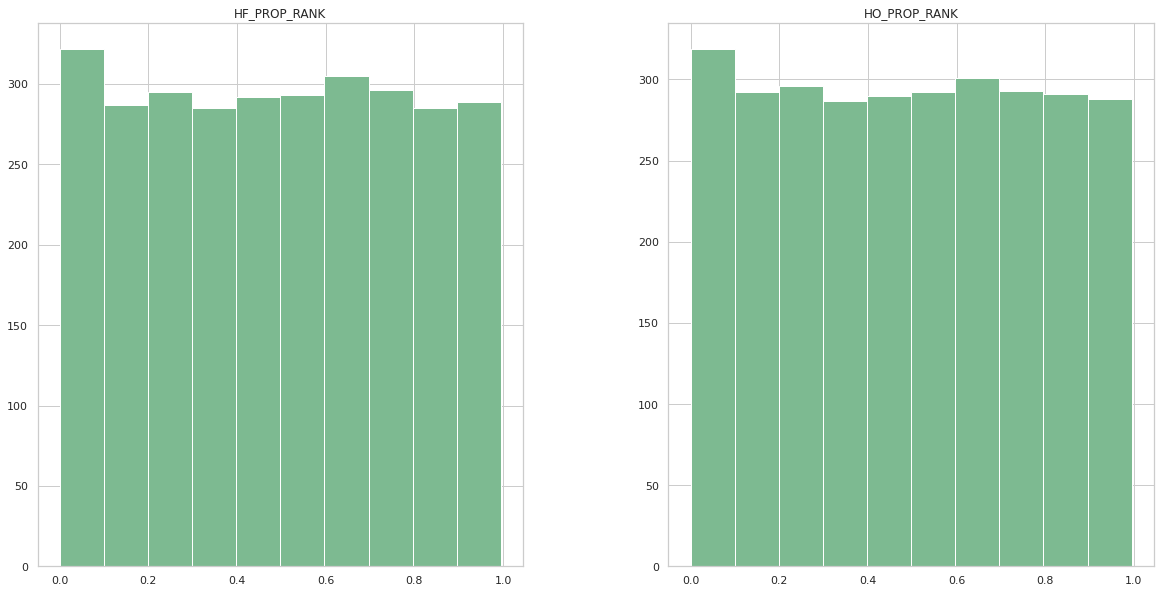

In [9]:
sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("HF_PROP_RANK", ax=axes[0])
medicare_counties.hist("HO_PROP_RANK", ax=axes[1])
plt.show()

In [10]:
medicare_counties[medicare_counties["HF_PROP_RANK"]>.6]["HF_PROP_RANK"].value_counts(normalize=True)

0.667    0.013901
0.750    0.013901
0.800    0.011295
0.955    0.008688
0.818    0.008688
           ...   
0.995    0.000869
0.823    0.000869
0.912    0.000869
0.771    0.000869
0.681    0.000869
Name: HF_PROP_RANK, Length: 361, dtype: float64

In [11]:
medicare_counties.loc[medicare_counties["HF_PROP_RANK"]>=0.6, "HF_HIGH"] = 1
medicare_counties.loc[medicare_counties["HF_PROP_RANK"]<0.6, "HF_HIGH"] = 0

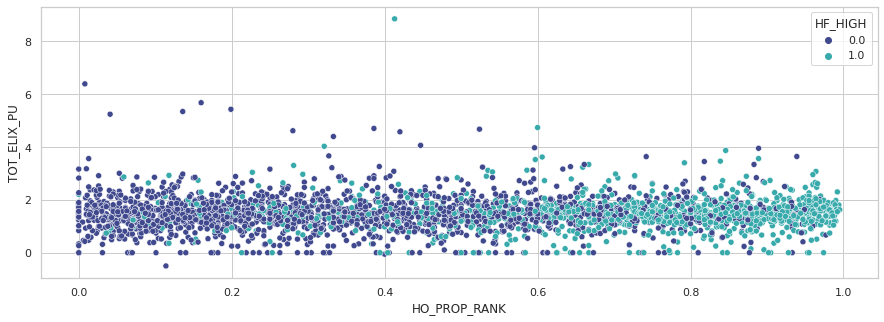

In [12]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.scatterplot(data=medicare_counties, x="HO_PROP_RANK", y="TOT_ELIX_PU", hue="HF_HIGH", palette="mako");


In [13]:
medicare_counties[medicare_counties["TOT_ELIX_PU"]>6]

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,NUM_COUNTIES,HO_RANK,HO_PROP_RANK,HO_QUARTILE,HF_RANK,HF_PROP_RANK,HF_QUARTILE,StateCode,CountyFIPS,HF_HIGH
1608,31.0,29.0,2,1,71.3,1.0,1.0,1.0,0.0,5,...,75.0,44.0,0.413,3.0,19.0,0.747,1.0,31.0,29.0,1.0
2797,51.0,595.0,2,2,54.9,1.0,1.0,2.0,1.0,15,...,132.0,131.0,0.008,4.0,124.0,0.061,4.0,51.0,595.0,0.0


In [14]:
# Remove 2 Outliers

medicare_counties = medicare_counties[medicare_counties["TOT_ELIX_PU"]<6]

## Mean Age, Prop Sex, and % Race

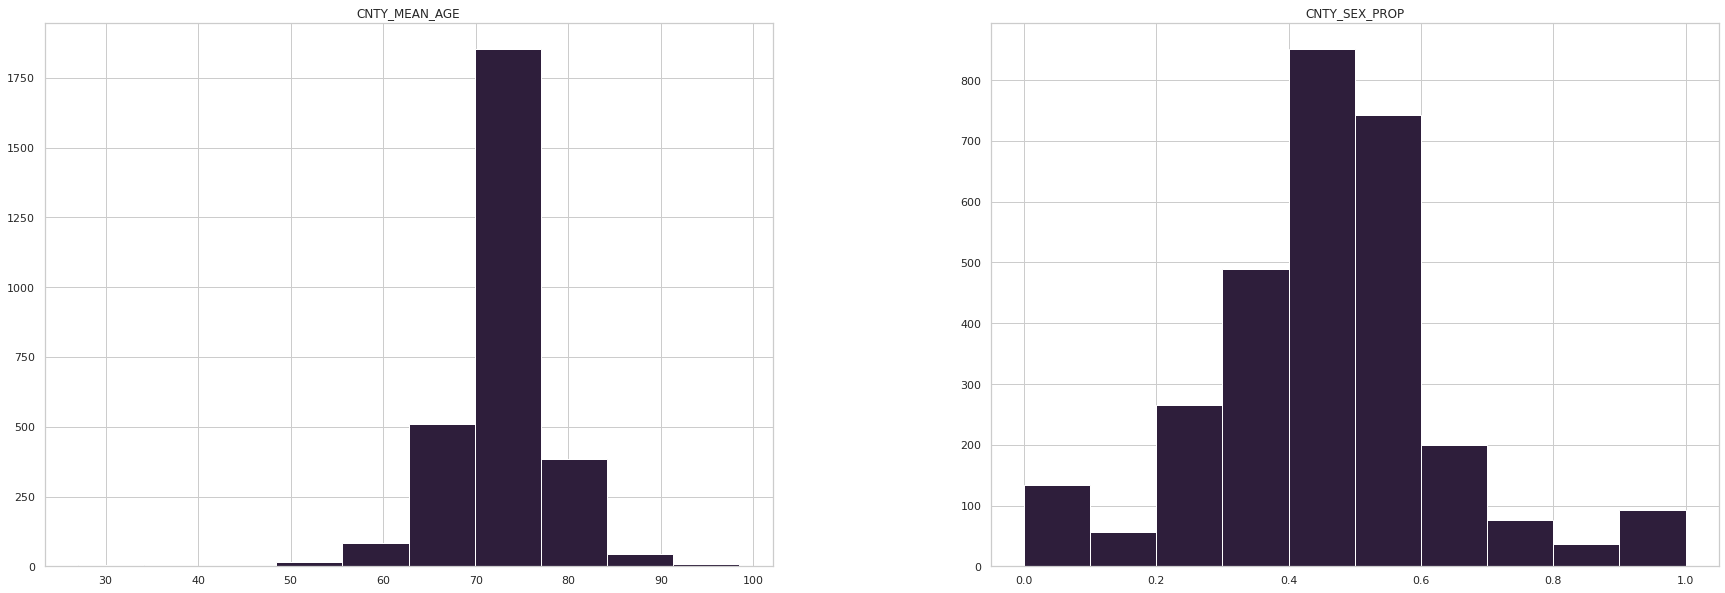

In [15]:
medicare_counties["CNTY_MEAN_AGE"] = medicare_counties["CNTY_MEAN_AGE"].round(decimals=1)

sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
medicare_counties.hist("CNTY_MEAN_AGE", ax=axes[0])
medicare_counties.hist("CNTY_SEX_PROP", ax=axes[1])
plt.show()

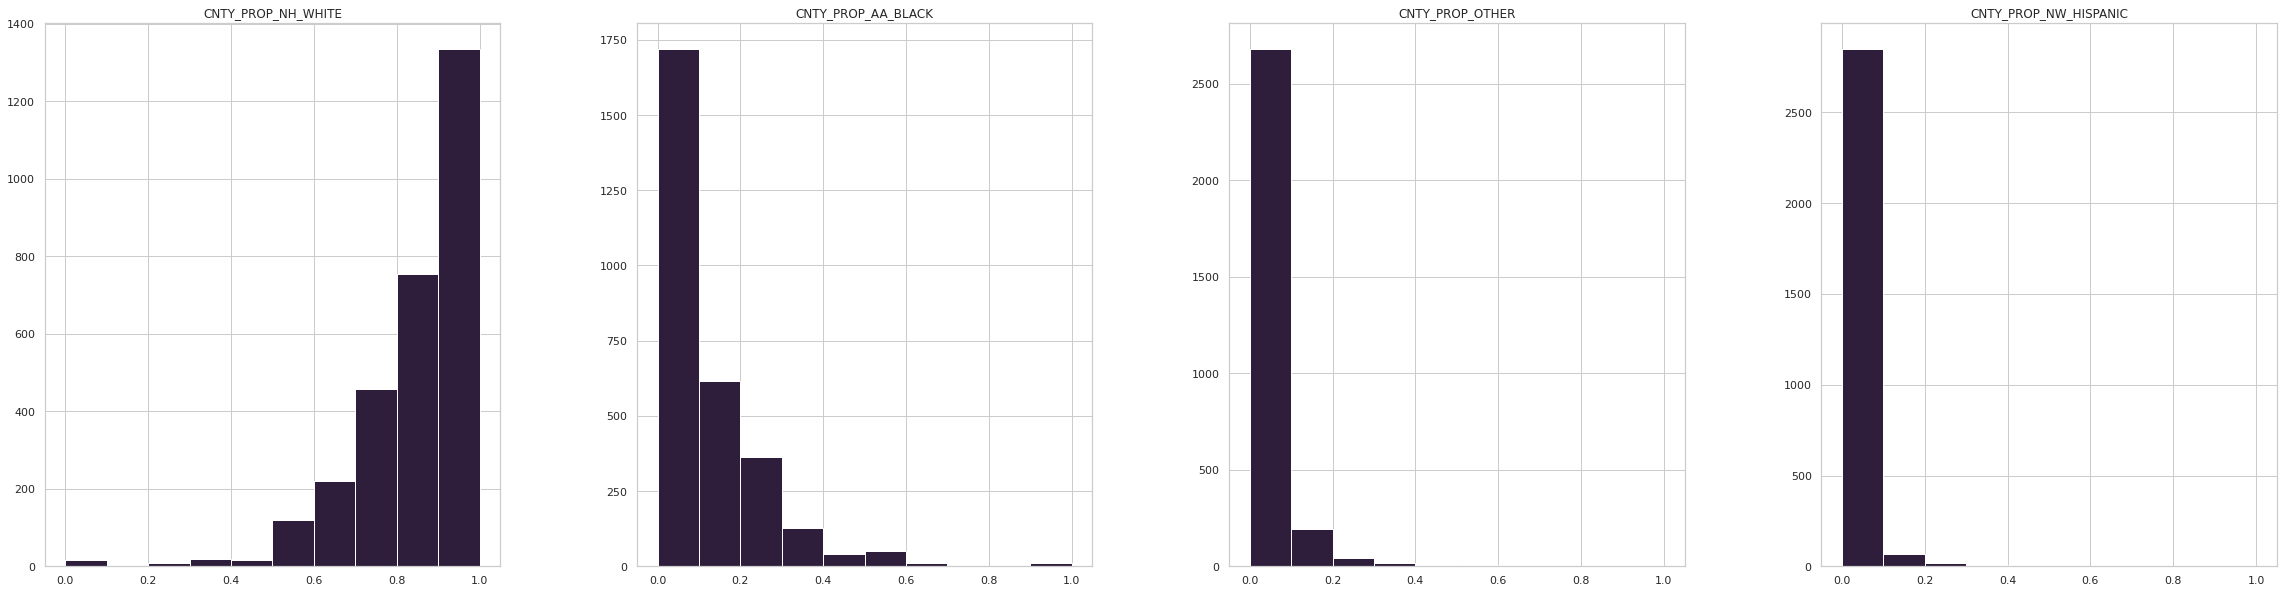

In [16]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
medicare_counties.hist("CNTY_PROP_NH_WHITE", ax=axes[0])
medicare_counties.hist("CNTY_PROP_AA_BLACK", ax=axes[1])
medicare_counties.hist("CNTY_PROP_OTHER", ax=axes[2])
medicare_counties.hist("CNTY_PROP_NW_HISPANIC", ax=axes[3])
plt.show()

## Case Counts

Let's see how these case counts correlate with the County Health Rankings, Total Costs and Stay Information.

In [17]:
medicare_counties["TOT_ESRD_PREV"].value_counts(normalize=True)


0.000000    0.183577
0.200000    0.044452
0.250000    0.043434
0.333333    0.040719
0.166667    0.040041
              ...   
0.242775    0.000339
0.219269    0.000339
0.205607    0.000339
0.161137    0.000339
0.121622    0.000339
Name: TOT_ESRD_PREV, Length: 528, dtype: float64

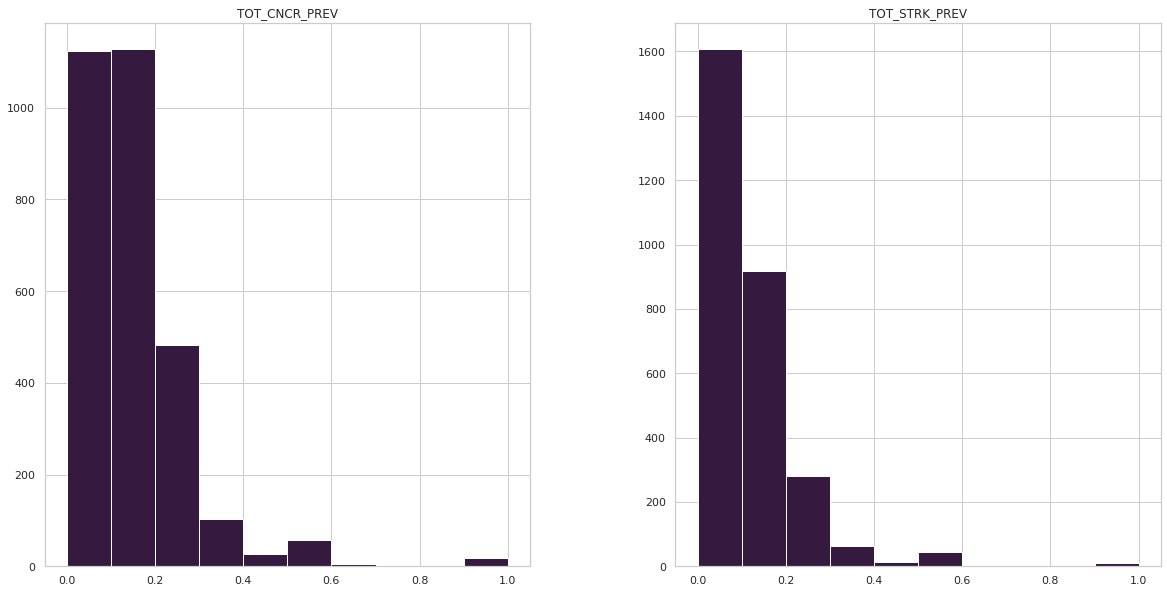

In [18]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("TOT_CNCR_PREV", ax=axes[0])
medicare_counties.hist("TOT_STRK_PREV", ax=axes[1])
plt.show()

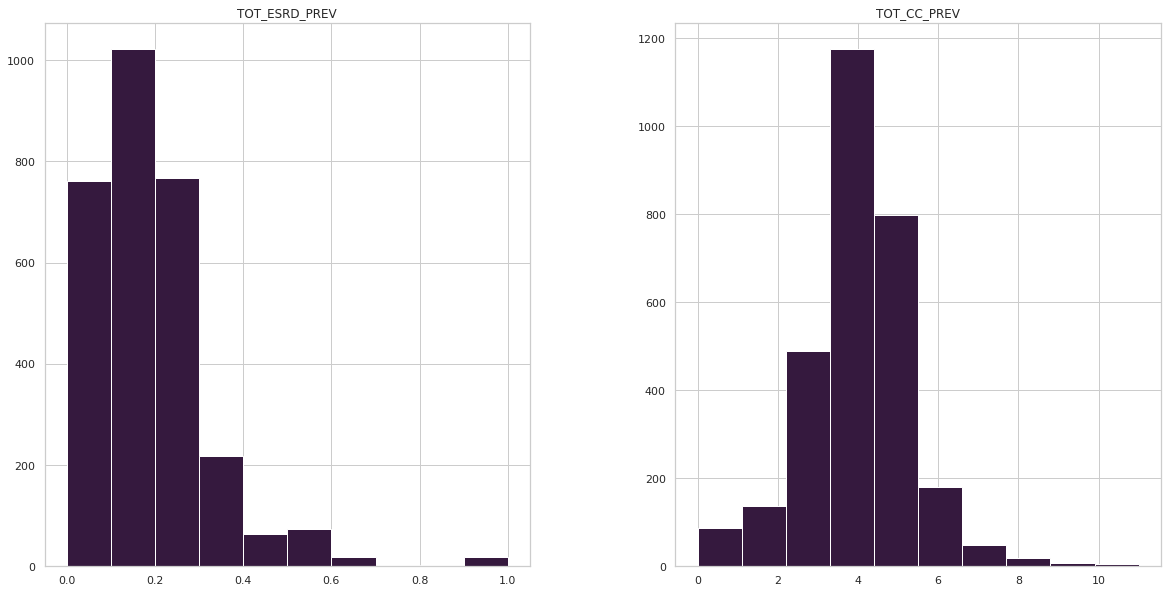

In [19]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("TOT_ESRD_PREV", ax=axes[0])
medicare_counties.hist("TOT_CC_PREV", ax=axes[1])
plt.show()

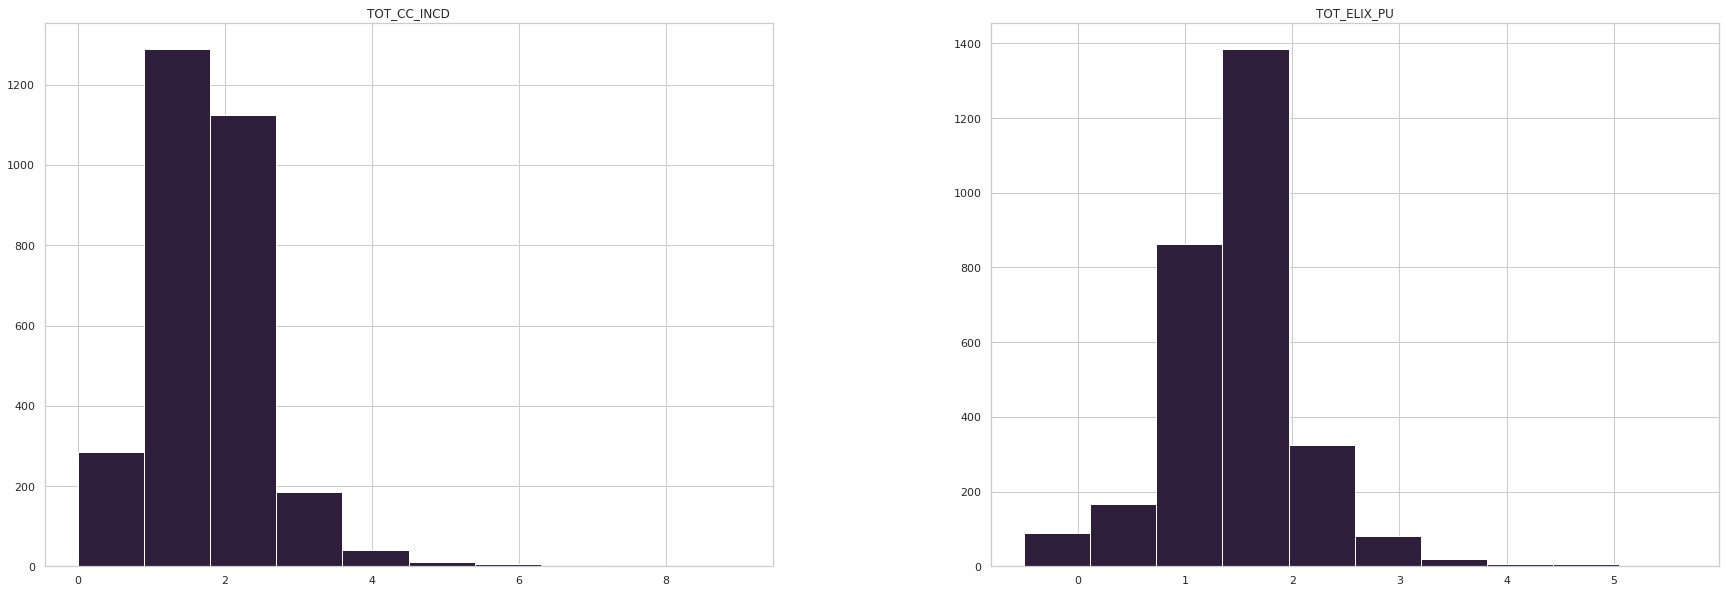

In [20]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
medicare_counties.hist("TOT_CC_INCD", ax=axes[0])
medicare_counties.hist("TOT_ELIX_PU", ax=axes[1])
plt.show()

## Severity Variable

Elixhauser Score Total per User, cut at 1.5 to establish "High Severity" for a County

In [21]:
medicare_counties.loc[medicare_counties["TOT_ELIX_PU"]>=1.5, "HIGH_SEV"] = 1
medicare_counties.loc[medicare_counties["TOT_ELIX_PU"]<1.5, "HIGH_SEV"] = 0

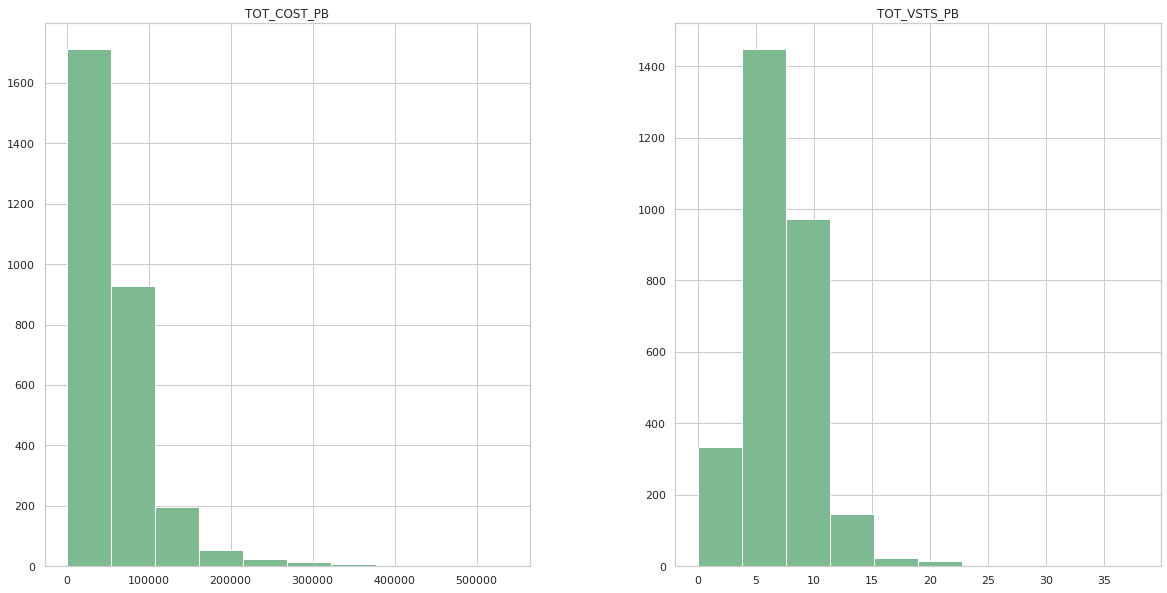

In [22]:
sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("TOT_COST_PB", ax=axes[0])
medicare_counties.hist("TOT_VSTS_PB", ax=axes[1])
plt.show()

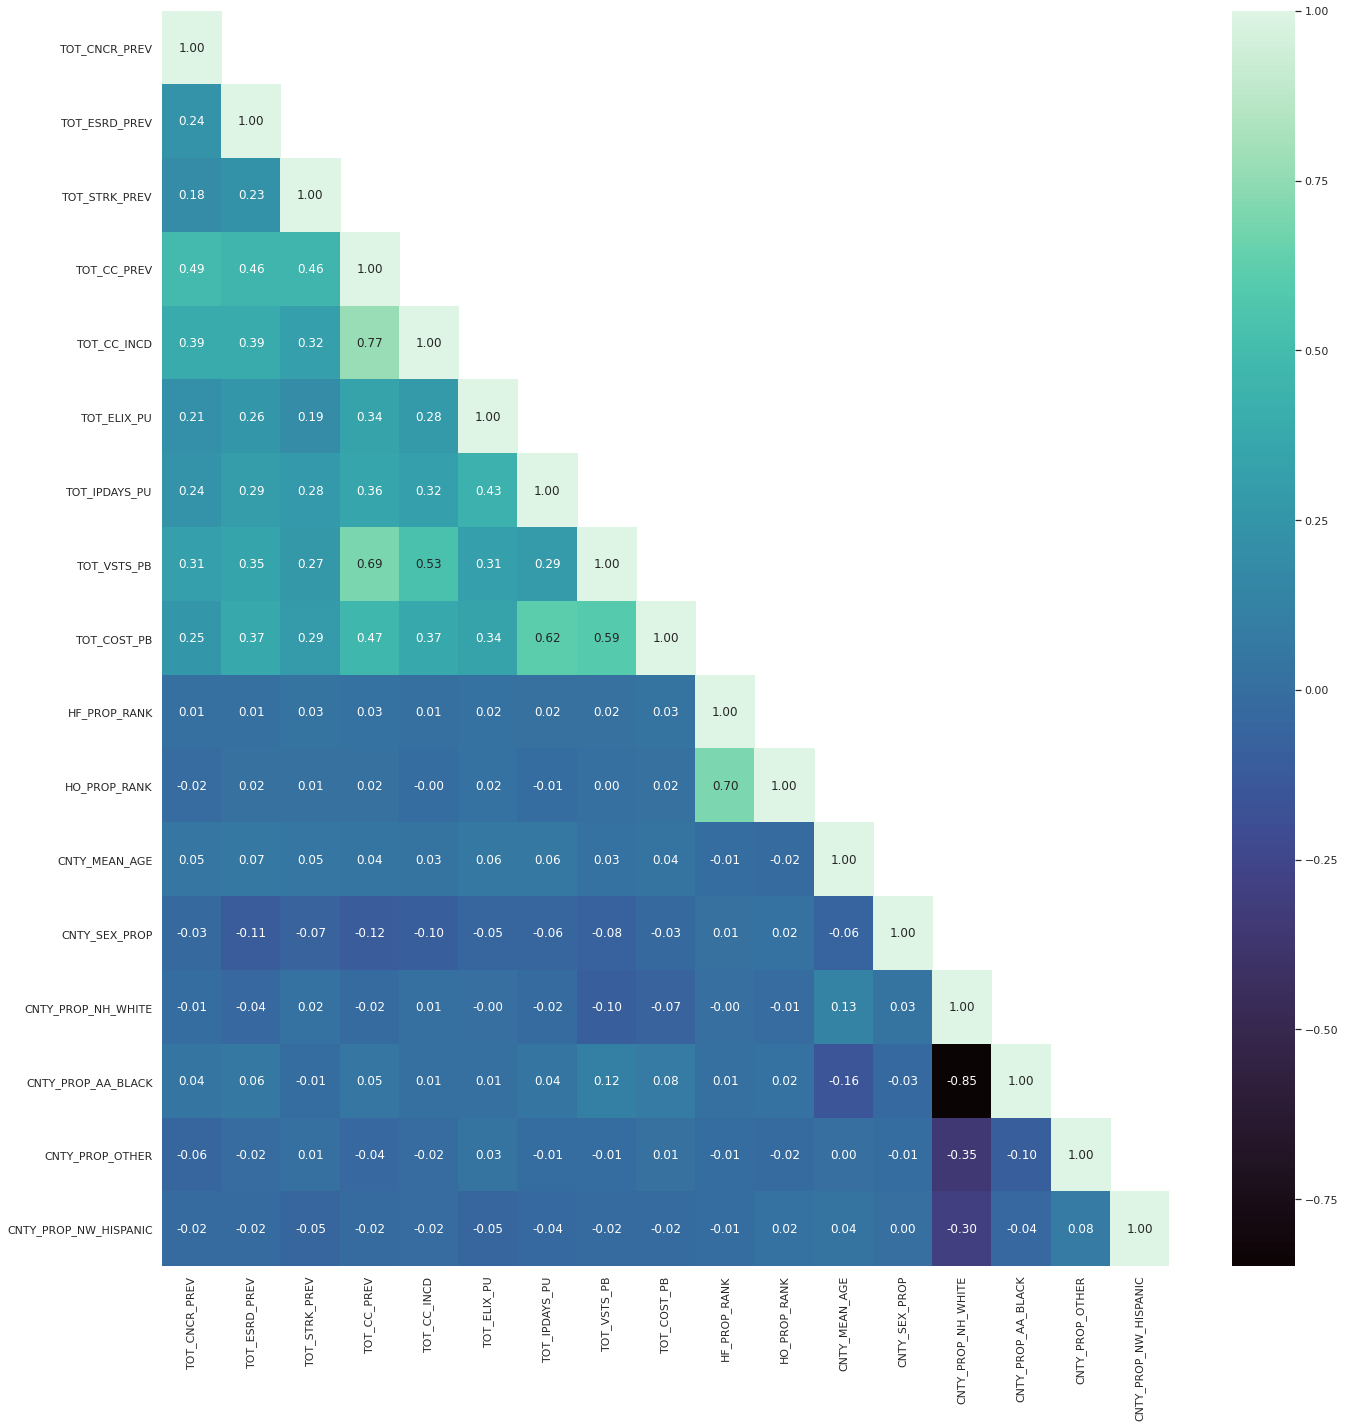

In [23]:
conditions = medicare_counties[["TOT_CNCR_PREV", "TOT_ESRD_PREV", "TOT_STRK_PREV", "TOT_CC_PREV", "TOT_CC_INCD", 
                                "TOT_ELIX_PU", "TOT_IPDAYS_PU", "TOT_VSTS_PB", "TOT_COST_PB", 
                                "HF_PROP_RANK", "HO_PROP_RANK", "CNTY_MEAN_AGE", "CNTY_SEX_PROP", "CNTY_PROP_NH_WHITE",
                               "CNTY_PROP_AA_BLACK", "CNTY_PROP_OTHER", "CNTY_PROP_NW_HISPANIC"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (20.0, 20.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.tight_layout()
fig.savefig("counties_cases_heatmap.png")

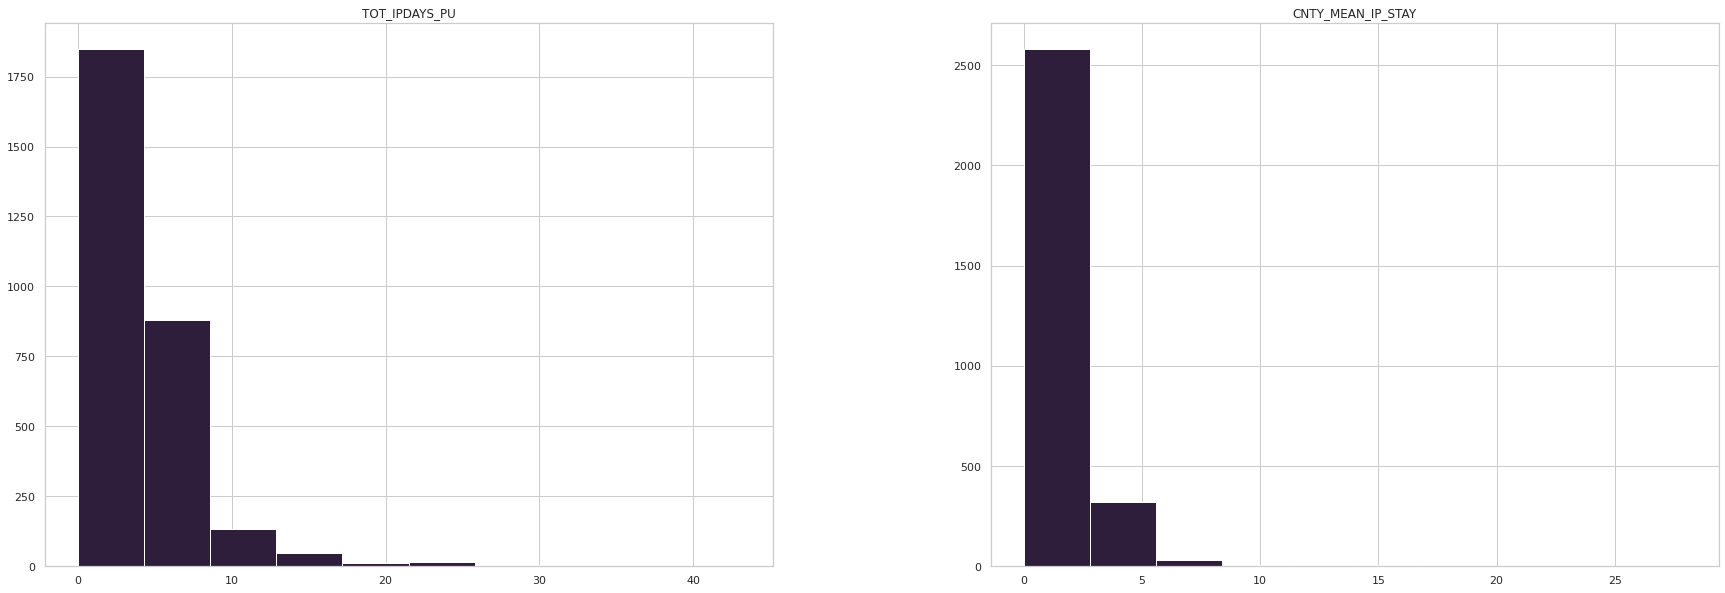

In [24]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
medicare_counties.hist("TOT_IPDAYS_PU", ax=axes[0])
medicare_counties.hist("CNTY_MEAN_IP_STAY", ax=axes[1])
plt.show()

## Super Users!

So, here are 160 Super-Utilizing Counties!


In [25]:
medicare_counties["DIVERSE_PROP"] = 1 - medicare_counties["CNTY_PROP_NH_WHITE"]

In [26]:
su = medicare_counties[(medicare_counties["TOT_IPDAYS_PU"]>15) | (medicare_counties["TOT_COST_PB"]>150000)]

In [27]:
cc = su[["STATE", "COUNTY", "CNTY_MEAN_AGE", "CNTY_SEX_PROP", "CNTY_PROP_NH_WHITE", "DIVERSE_PROP", 
                       "HF_PROP_RANK", "HO_PROP_RANK", "TOT_IPDAYS_PU", "TOT_COST_PB"]]

cc_super_states = cc.groupby(["STATE", "COUNTY"]).aggregate({"TOT_COST_PB":"mean", "TOT_IPDAYS_PU":"mean", 
                                                            "HF_PROP_RANK":"mean", "HO_PROP_RANK":"mean"})
cc_super_states.sort_values(by="TOT_COST_PB", ascending=False).head(20)

,,TOT_COST_PB,TOT_IPDAYS_PU,HF_PROP_RANK,HO_PROP_RANK
STATE,COUNTY,,,,
Kentucky,Hickman,538250.000000,23.000000,0.483,0.208
Nebraska,Seward,500597.666667,22.666667,0.987,0.933
Ohio,Noble,498662.000000,17.500000,0.136,0.784
Missouri,Bates,472382.500000,9.571429,0.122,0.774
Kentucky,Breathitt,472226.666667,15.166667,0.067,0.150
Nebraska,Fillmore,432855.600000,18.800000,0.920,0.440
Louisiana,St. James,425790.000000,12.833333,0.297,0.594
Kansas,Clark,405330.000000,3.500000,0.717,0.303
Virginia,Amelia,404384.000000,9.000000,0.386,0.280


So, this new look at the data appears to show that the Health Factor and Outcome rankings are very much spread across utilizers.  So, some low-ranked counties are high utilizers, but some are definitely not.  Also, some high-ranked counties are also high utilizers.

Very interesting!!

In [30]:
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 0 to 3009
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS_STATE_CODE        2947 non-null   float64
 1   FIPS_COUNTY_CODE       2947 non-null   float64
 2   CNTY_BENE_CT           2947 non-null   int64  
 3   CNTY_BENE_USRS         2947 non-null   int64  
 4   CNTY_MEAN_AGE          2909 non-null   float64
 5   CNTY_SEX_PROP          2947 non-null   float64
 6   TOT_CNCR_CASES         2947 non-null   float64
 7   TOT_STRKETIA_CASES     2947 non-null   float64
 8   TOT_ESRD_CASES         2947 non-null   float64
 9   CNTY_TOT_VSTS          2947 non-null   int64  
 10  CNTY_TOT_IP_VSTS       2947 non-null   int64  
 11  CNTY_TOT_OP_VSTS       2947 non-null   int64  
 12  CNTY_MEAN_IP_STAY      2947 non-null   float64
 13  CBSA                   1091 non-null   float64
 14  CNTY_TOT_CCS           2947 non-null   float64
 15  CNTY

In [31]:
medicare_counties.drop(["StateCode", "CountyFIPS"], inplace=True, axis=1, errors="ignore")

In [32]:
medicare_counties.to_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED.csv")